# Introduction au Notebook d'Apprentissage du Machine Learning

Bienvenue dans ce notebook dédié à l'apprentissage du machine learning (ML), conçu pour les débutants. Le machine learning est une branche de l'intelligence artificielle qui permet aux ordinateurs d'apprendre à partir de données et de faire des prédictions ou des décisions sans être explicitement programmés pour chaque tâche. 


Dans ce notebook, nous allons nous concentrer sur un cas d'**apprentissage supervisé** plus spécifiquement un problème de **régression**. La régression consiste à prédire une **valeur numérique** continue en fonction d'un certain nombre de variables explicatives. Dans notre cas, nous allons essayer de prédire le **prix des voitures** en fonction de diverses caractéristiques comme la marque, le kilométrage, l'année, etc.

## Fonctionnement d'un Jupyter Notebook

Un **Jupyter Notebook** est un environnement interactif qui permet de combiner du code exécutable, du texte explicatif, des graphiques et d'autres éléments visuels, le tout dans un même document. C'est un outil puissant pour les scientifiques des données, car il facilite l'expérimentation, l'analyse des données et la présentation des résultats. 

### Structure d'un Jupyter Notebook

Le notebook est organisé en **cellules** qui peuvent contenir soit du code, soit du texte en format Markdown (comme cette cellule). Voici les deux principaux types de cellules :

1. **Cellules de code** : Ce sont des blocs dans lesquels vous écrivez et exécutez du code (souvent en Python, mais Jupyter supporte plusieurs langages). Lorsque vous exécutez une cellule de code, le résultat est affiché juste en dessous. Cela peut être un résultat de calcul, un tableau, ou encore un graphique.

2. **Cellules de texte (Markdown)** : Ces cellules permettent d'écrire des explications, des titres, des listes ou d'autres formes de documentation en utilisant le langage Markdown. Cela permet de rendre le notebook lisible et structuré. Vous pouvez formater le texte en ajoutant des titres, des listes, des liens ou des images.

### Exécution des cellules

Chaque cellule de code peut être exécutée indépendamment en appuyant sur le bouton "Exécuter" ou en utilisant le raccourci `Shift + Enter`. Les cellules de code s'exécutent dans l'ordre dans lequel vous les exécutez, et non nécessairement de haut en bas. Cela vous permet de tester des sections spécifiques de votre code sans avoir à exécuter tout le document.


## Étapes du Notebook

1. **Importation et Analyse Exploratoire des Données (EDA)** : Avant de créer un modèle, il est essentiel de bien comprendre les données avec lesquelles nous travaillons. Cette première étape consiste à importer les données, à examiner leur structure et à identifier des patterns ou des anomalies.
   
2. **Préparation des données** : Nous préparerons les données pour la modélisation en les nettoyant, en traitant les valeurs manquantes et en convertissant les variables catégorielles en un format que le modèle peut comprendre.

3. **Modélisation avec des algorithmes de régression** : Nous créerons des modèles de régression, tels que la régression linéaire ou d'autres modèles plus avancés, pour prédire le prix des voitures.

4. **Explicabilité du modèle**


## Présentation du Dataset

<div style="text-align: center;">
    <img src="/data/ai/hackathon/Lambo_STJ_Huracan_1.jpeg" alt="Description de l'image" style="width:40%; height:auto;">
</div>


Le dataset utilisé dans ce notebook provient de la plateforme "Car Dekho" et contient des informations détaillées sur plusieurs modèles de voitures. Voici un aperçu des principales colonnes de ce dataset :

- **name** : Le nom et modèle spécifique de la voiture (ex : "Maruti Swift", "Hyundai Verna").
- **year** : L'année de fabrication de la voiture, qui peut avoir un impact sur sa valeur actuelle.
- **selling_price** : Le prix de vente de la voiture en roupies indiennes. Il s'agit de la variable cible que nous chercherons à prédire à partir des autres caractéristiques.
- **km_driven** : Le nombre de kilomètres parcourus par la voiture, un indicateur clé de l'usure et de l'état général du véhicule.
- **fuel** : Le type de carburant utilisé par la voiture (essence, diesel, GNV, etc.).
- **seller_type** : Le type de vendeur (particulier ou concessionnaire), ce qui peut influencer le prix de vente.
- **transmission** : Le type de transmission du véhicule (manuelle ou automatique).
- **owner** : Le nombre de propriétaires précédents de la voiture, qui peut affecter la perception de l'usure du véhicule.

Ce jeu de données nous permettra de créer un modèle capable de prédire le **selling_price** (prix de vente) d'une voiture d'occasion en fonction des différentes caractéristiques mentionnées ci-dessus.


Prêt à commencer ? Passons à l'importation et à l'analyse de ces données !


## 1. Importation et Analyse exploratoire des données

Exécutez la cellule suivante pour charger et afficher les premières lignes du dataframe


In [35]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df_main = pd.read_csv('car_price_cropped.csv')
df_main


,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
142,Yamaha FZ v 2.0,2015,0.60,29000,Petrol,Individual,Manual,0
143,Yamaha FZ v 2.0,2016,0.60,25000,Petrol,Individual,Manual,0
144,Bajaj Pulsar NS 200,2014,0.60,25000,Petrol,Individual,Manual,0
145,TVS Apache RTR 160,2012,0.60,19000,Petrol,Individual,Manual,0


Exécutez cette cellule pour afficher le nombre de données manquantes pour chacune des colonnes

In [36]:
#missing values
df_main.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

On observe qu'il n'y a aucune donnée manquantes, on peut donc passer à la suite sans passer par la phase de nettoyage des données manquantes. Nous pouvons passer à la phase de visualisation.

Modifiez la cellule suivante pour afficher des graphiques sur la distribution de l'essence, du type de vendeur, de la boite de vitesse et du propriétaire. Modifiez les XXX par les noms des colonnes correspondantes affichées plus haut

ValueError: Could not interpret value `XXX` for `x`. An entry with this name does not appear in `data`.

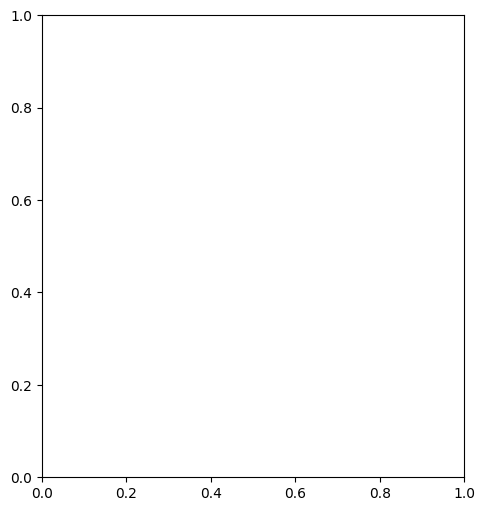

In [37]:
cat_cols = ['XXX', 'XXX', 'XXX', 'XXX']
i = 0

while i < 4:
    fig = plt.figure(figsize=[12, 6])  # Augmentez la taille de la figure si nécessaire

    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=df_main)
    plt.title(cat_cols[i])  # Ajout du titre pour la clarté
    plt.xticks(rotation=45)  # Rotation des labels si nécessaire

    i += 1

    plt.subplot(1, 2, 2)
    sns.countplot(x=cat_cols[i], data=df_main)
    plt.title(cat_cols[i])  # Ajout du titre pour la clarté
    plt.xticks(rotation=45)  # Rotation des labels si nécessaire

    plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Ajoute de l'espace entre les sous-graphes
    plt.show()
    i += 1


De la même manière, affichez les distributions pour les colonnes correspondant à l'année, au prix de vente et au kilométrage.

KeyError: 'XXX'

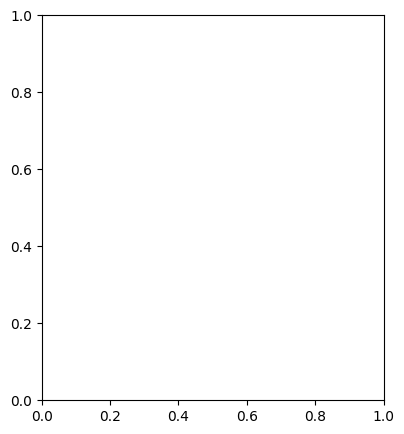

In [38]:
# Liste des colonnes numériques à tracer
num_cols = ['XXX', 'XXX', 'XXX']

# Définir la taille de la figure
plt.figure(figsize=(15, 5))

# Boucle sur chaque colonne numérique
for i, col in enumerate(num_cols):
    # Créer un sous-graphe pour chaque colonne
    plt.subplot(1, len(num_cols), i+1)
    sns.histplot(df_main[col], bins=20, kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()
plt.show()

## Préparation des données

Il faut modifier les données pour les rendre utilisables par le modèle et plus claires:
- Modifier la date en age
- Encoder les catégories, créer une variable vrai ou faux a chaque fois (developper)

In [39]:
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)
df_main.drop(labels='Car_Name',axis= 1, inplace = True)
df_main = pd.get_dummies(data = df_main,drop_first=True) 

In [40]:
df_main

,Selling_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,27000,0,6,False,True,False,True
1,4.75,43000,0,7,True,False,False,True
2,7.25,6900,0,3,False,True,False,True
3,2.85,5200,0,9,False,True,False,True
4,4.60,42450,0,6,True,False,False,True
...,...,...,...,...,...,...,...,...
142,0.60,29000,0,5,False,True,True,True
143,0.60,25000,0,4,False,True,True,True
144,0.60,25000,0,6,False,True,True,True
145,0.60,19000,0,8,False,True,True,True


### Train-Test Split

### Importance du Train-Test Split

Le **train-test split** est une étape essentielle dans le processus de développement d'un modèle de machine learning. Il consiste à diviser les données en deux ensembles distincts :

1. **Ensemble d'entraînement** : 
   - Utilisé pour entraîner le modèle. Le modèle apprend à partir de ces données.

2. **Ensemble de test** : 
   - Utilisé pour évaluer la performance du modèle. Il teste comment le modèle se comporte sur des données qu'il n'a jamais vues.

#### Pourquoi est-ce important ?

- **Généralisation** : En entraînant le modèle sur un ensemble et en le testant sur un autre, nous pouvons vérifier s'il est capable de faire des prédictions précises sur de nouvelles données. Cela aide à s'assurer que le modèle n'a pas simplement mémorisé les données d'entraînement, mais a réellement appris à généraliser à partir d'elles.

<br>

<br>

<div style="text-align: center;">
    <img src="/data/ai/hackathon/TrainTestDiagram1.png" alt="Description de l'image" style="width:40%; height:auto;">
</div>



In [23]:
from sklearn.model_selection import train_test_split

# Separating target variable and its features
y = df_main['Selling_Price']
X = df_main.drop('Selling_Price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (117, 7)
x test:  (30, 7)
y train:  (117,)
y test:  (30,)


## 3. Model Creation/Evaluation

Maintenant on va entrainer un modèle sur l'entrainement. Remplir avec X_train et y_train

In [24]:
import xgboost as xgb


# Création et entraînement du modèle XGBoost
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Le modèle est entrainé, on va maintenant prédire ce que nous donne le modèle sur les données de train (X_train) et les données de test (X_test).

In [26]:
# Prédictions sur les ensembles d'entraînement et de test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

On veut maintenant comprendre le modèle

#### Erreur Absolue Moyenne (MAE)

L'erreur absolue moyenne (MAE) est une autre métrique utilisée pour évaluer les performances d'un modèle de régression. Elle mesure la moyenne des erreurs absolues entre les valeurs prédites et les valeurs réelles. Contrairement à \( R^2 \), le MAE est une valeur qui peut aller de 0 à l'infini :
- **MAE proche de 0** : Cela indique que les prédictions du modèle sont très proches des valeurs réelles, ce qui est souhaitable.
- **MAE élevé** : Cela signifie que les prédictions du modèle s'écartent considérablement des valeurs réelles.

En résumé, pour un modèle de régression performant, nous souhaitons que le \( R^2 \) soit proche de 1 et que le MAE soit proche de 0.


In [28]:
from sklearn.metrics import mean_absolute_error


# Calcul des MAE
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

print("Train MAE :", MAE_train)
print("Test MAE :", MAE_test)


Train MAE : 0.059798381063673245
Test MAE : 2.9858661864598592


In [44]:
df_main = pd.read_csv('car_price.csv')
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)
df_main.drop(labels='Car_Name',axis= 1, inplace = True)
df_main = pd.get_dummies(data = df_main,drop_first=True) 

y = df_main['Selling_Price']
X = df_main.drop('Selling_Price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Création et entraînement du modèle XGBoost
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

print("Train MAE :", MAE_train)
print("Test MAE :", MAE_test)


Train MAE : 0.11847626626864076
Test MAE : 1.3296822195707778


In [45]:
df_main = pd.read_csv('car_price_with_present_price.csv')
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)
df_main.drop(labels='Car_Name',axis= 1, inplace = True)
df_main = pd.get_dummies(data = df_main,drop_first=True) 

y = df_main['Selling_Price']
X = df_main.drop('Selling_Price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Création et entraînement du modèle XGBoost
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

print("Train MAE :", MAE_train)
print("Test MAE :", MAE_test)


Train MAE : 0.008368594904740644
Test MAE : 0.539915648053904


On voit que le modèle est assez bon sur nos données d'entrainements mais un peu moins bon sur des données qu'il n'a jamais vu, même si les résultats ne sont pas si mauvais.

## 4. Explicabilité du modèle 

Les **SHAP values** (SHapley Additive exPlanations) nous aident à comprendre l'importance des variables dans un modèle de machine learning.


Les SHAP values nous permettent de savoir combien chaque variable contribue à la prédiction finale. Par exemple, elles nous montrent si l'année de la voiture a un impact plus important que le kilométrage sur le prix prédit. Cela rend les décisions du modèle plus transparentes et compréhensibles.


/data/home/zakary.saheb/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


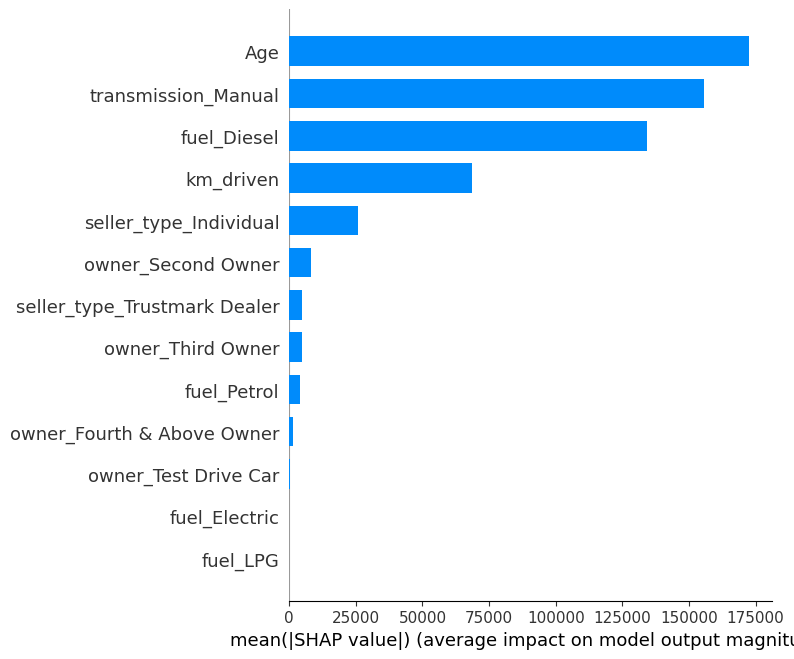

In [11]:
import shap 

# Calcul des SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Visualisation des SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar')
